In [1]:
import numpy as np
import tensorflow as tf

import wf_psf as wf_psf

%pylab inline

import cv2 as cv2 


Populating the interactive namespace from numpy and matplotlib


<module 'cv2.cv2' from '/Users/tliaudat/opt/anaconda3/envs/WF_PSF/lib/python3.6/site-packages/cv2/cv2.cpython-36m-darwin.so'>

In [16]:
dataset_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/github/wf-psf/data/psf_field_dataset/train_dataset_256_bin20_z45_bis.npy'
dataset = np.load(dataset_path, allow_pickle=True)[()]



In [19]:
test_star = dataset['stars'][10,:,:]

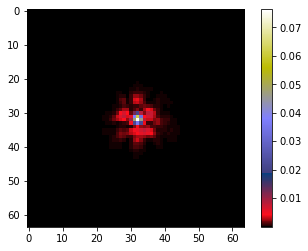

In [20]:
imshow(test_star, cmap='gist_stern');colorbar()


In [103]:
input_dim = 64
Q = 3
output_dim = int(input_dim/Q//1)
output_dim

21

In [104]:
down_image_cv2 = wf_psf.utils.downsample_im(test_star, output_dim)


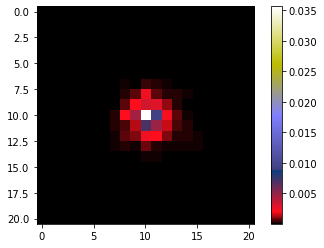

In [105]:
imshow(down_image_cv2, cmap='gist_stern');colorbar()

In [106]:
# Resulting dimension from average pooling
f=3
s=3
((64 -f)/s + 1) // 1

21.0

In [107]:
avg_pool_layer = tf.keras.layers.AveragePooling2D(
                                                pool_size=(Q, Q), strides=None,
                                                padding='valid', data_format='channels_last')

tf_test_star = tf.convert_to_tensor(test_star, dtype=tf.float32)


In [108]:


down_image_tf = avg_pool_layer(tf_test_star[tf.newaxis, ..., tf.newaxis]).numpy()



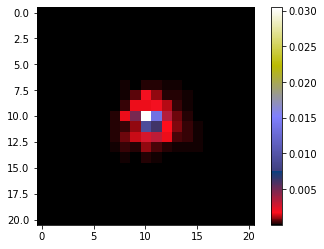

In [109]:
imshow(down_image_tf[0,:,:,0], cmap='gist_stern');colorbar()

In [110]:
down_image_tf_resize = tf.image.resize(
                                        tf_test_star[tf.newaxis, ..., tf.newaxis],
                                        size=[output_dim, output_dim],
                                        method=tf.image.ResizeMethod.AREA,
                                        preserve_aspect_ratio=False,
                                        antialias=True).numpy()

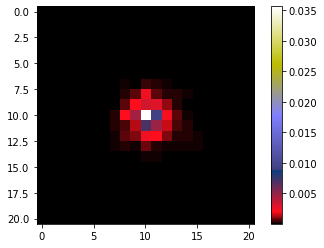

In [111]:
imshow(down_image_tf_resize[0,:,:,0], cmap='gist_stern');colorbar()


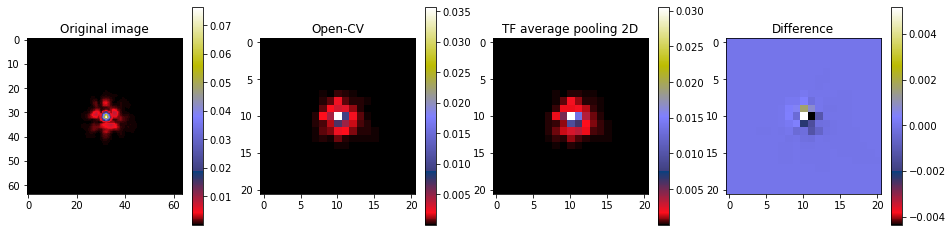

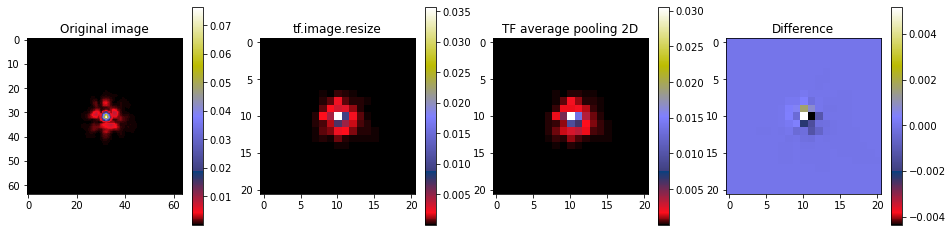

In [112]:

figure(figsize=(16,4))

subplot(141)
imshow(test_star, cmap='gist_stern');colorbar()
title('Original image')

subplot(142)
imshow(down_image_cv2, cmap='gist_stern');colorbar()
title('Open-CV')

subplot(143)
imshow(down_image_tf[0,:,:,0], cmap='gist_stern');colorbar()
title('TF average pooling 2D')

subplot(144)
imshow(down_image_cv2 - down_image_tf[0,:,:,0], cmap='gist_stern');colorbar()
title('Difference')

show()


figure(figsize=(16,4))

subplot(141)
imshow(test_star, cmap='gist_stern');colorbar()
title('Original image')

subplot(142)
imshow(down_image_tf_resize[0,:,:,0], cmap='gist_stern');colorbar()
title('tf.image.resize')

subplot(143)
imshow(down_image_tf[0,:,:,0], cmap='gist_stern');colorbar()
title('TF average pooling 2D')

subplot(144)
imshow(down_image_tf_resize[0,:,:,0] - down_image_tf[0,:,:,0], cmap='gist_stern');colorbar()
title('Difference')

show()

In [44]:
down_image_tf.shape

(1, 21, 21, 1)

21.0